In [8]:
using Pkg; Pkg.activate("")

 Activating environment at `~/work/covid/Project.toml`


In [78]:
using HTTP, CSV, Query, DataFrames
using LinearAlgebra

In [102]:
url_cases = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv"
url_counties = "https://opendata.arcgis.com/datasets/917fc37a709542548cc3be077a786c17_0.csv"

"https://opendata.arcgis.com/datasets/917fc37a709542548cc3be077a786c17_0.csv"

In [103]:
function query(url)
    response = HTTP.get(url)
    return CSV.read(response.body)
end

query (generic function with 1 method)

In [104]:
counties = query(url_counties)
cases = query(url_cases);

In [120]:
println("Counties columns: ", names(counties_hamburg))
println("Cases coulmns: ", names(cases_hamburg))

Counties columns: [:OBJECTID, :ADE, :GF, :BSG, :RS, :AGS, :SDV_RS, :GEN, :BEZ, :IBZ, :BEM, :NBD, :SN_L, :SN_R, :SN_K, :SN_V1, :SN_V2, :SN_G, :FK_S3, :NUTS, :RS_0, :AGS_0, :WSK, :EWZ, :KFL, :DEBKG_ID, :Shape__Area, :Shape__Length, :death_rate, :cases, :deaths, :cases_per_100k, :cases_per_population, :BL, :BL_ID, :county, :last_update]
Cases coulmns: [:IdBundesland, :Bundesland, :Landkreis, :Altersgruppe, :Geschlecht, :AnzahlFall, :AnzahlTodesfall, :ObjectId, :Meldedatum, :IdLandkreis, :Datenstand, :NeuerFall, :NeuerTodesfall]


In [268]:
?@orderby_ascending

No documentation found.

Binding `@orderby_ascending` does not exist.


In [264]:
counties_hamburg = counties |> @filter(_.GEN == "Hamburg") |> DataFrame
cases_hamburg = cases |> @filter(_.Bundesland == "Hamburg") |> @orderby_descending(_.Meldedatum) |> DataFrame;

In [136]:
select(counties_hamburg, [:death_rate, :cases, :deaths])

,death_rate,cases,deaths
,Float64,Int64,Int64
1,0.410771,2191,9


In [137]:
cases_hamburg = select(cases_hamburg, [:Meldedatum, :AnzahlFall, :AnzahlTodesfall, :NeuerFall, :NeuerTodesfall])

,Meldedatum,AnzahlFall,AnzahlTodesfall,NeuerFall,NeuerTodesfall
,String,Int64,Int64,Int64,Int64
1,2020-03-29T00:00:00.000Z,1,0,0,-9
2,2020-03-29T00:00:00.000Z,2,0,1,-9
3,2020-03-29T00:00:00.000Z,1,0,1,-9
4,2020-03-29T00:00:00.000Z,5,0,0,-9
5,2020-03-29T00:00:00.000Z,10,0,1,-9
6,2020-03-29T00:00:00.000Z,5,0,0,-9
7,2020-03-29T00:00:00.000Z,11,0,1,-9
8,2020-03-29T00:00:00.000Z,6,0,0,-9
9,2020-03-29T00:00:00.000Z,21,0,1,-9


In [ ]:
cases_hamburg

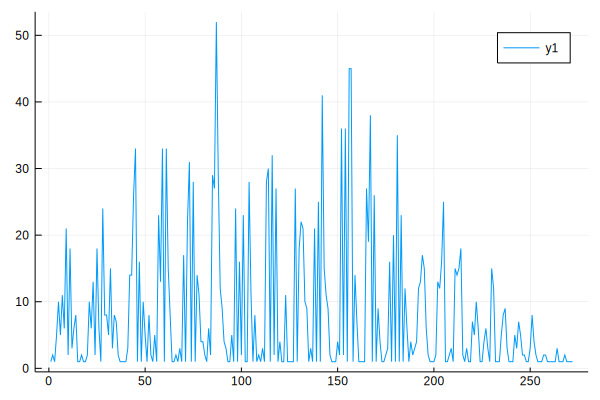

In [145]:
plot(cases_hamburg[!, :AnzahlFall])

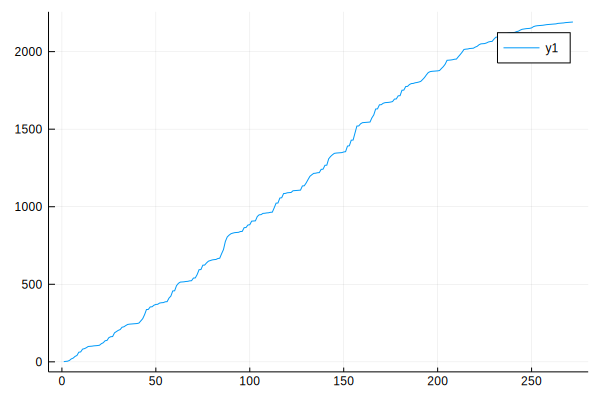

In [146]:
plot(cumsum(cases_hamburg[!, :AnzahlFall]))

In [154]:
using Reel

┌ Info: Precompiling Reel [71555da5-176e-5e73-a222-aebc6c6e4f2f]
└ @ Base loading.jl:1260


In [169]:
cases_hamburg_daily = [cases_hamburg |> @filter(_.Meldedatum == date) |> DataFrame for date in unique(cases_hamburg[!, :Meldedatum])];

In [172]:
cases_hamburg_per_day = [sum(c[!, :AnzahlFall]) for c in cases_hamburg_daily];

In [273]:
cases_hamburg_per_day = cases_hamburg_per_day[end:-1:1]

30-element Array{Int64,1}:
   1
   1
   1
   1
   3
   5
   2
   3
   5
  20
  26
  29
  42
   ⋮
 128
 194
 133
 111
 144
 127
 177
 138
 138
 137
 141
 103

In [274]:
frame_data = repeat(cumsum(cases_hamburg_per_day), 1, length(cases_hamburg_per_day))
frame_data = UpperTriangular(frame_data)
frame_data = Array{Union{Missing, Int64},2}(frame_data)
frame_data[frame_data .== 0] .= missing
frame_data

30×30 Array{Union{Missing, Int64},2}:
 1         1         1         1         …     1            1            1
  missing  2         2         2               2            2            2
  missing   missing  3         3               3            3            3
  missing   missing   missing  4               4            4            4
  missing   missing   missing   missing        7            7            7
  missing   missing   missing   missing  …    12           12           12
  missing   missing   missing   missing       14           14           14
  missing   missing   missing   missing       17           17           17
  missing   missing   missing   missing       22           22           22
  missing   missing   missing   missing       42           42           42
  missing   missing   missing   missing  …    68           68           68
  missing   missing   missing   missing       97           97           97
  missing   missing   missing   missing      139          139 

In [275]:
duration = 5
fps = 30

30

In [277]:
film = roll(fps=fps, duration=duration) do t, dt
    f = clamp(Int(ceil(t/dt/5))+1, 0, size(frame_data)[2])
    plot(frame_data[:, f])
end

write("output.webm", film)

"output.webm"